You are given a generated regression dataset `D: (X, y)` along already split train and test subsets, `X_train, X_test, y_train, y_test`. You are also given the true underlying coefficients `coef`.

    Linear regression tasks
    -----------------------
    1. Build a linear regression model using sklearn.
    2. Compute the MSE on the train and test sets.
    3. Compare the true and learned coefficients.
    4. Plot the regression line for any two top coefficients.
    5. Describe what you have seen based on the experiements (minimum 150 words).

Resources:
1. [Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [Plotting](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [194]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [195]:
#@title Data Generation (DO NOT MODIFY)
X, y, coef = make_regression(n_samples=500, n_features=15, n_informative=8, effective_rank=6.0, noise=3.0, coef=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [196]:
# WRITE YOUR CODE STARTING HERE

import matplotlib.pyplot as plt
%matplotlib inline


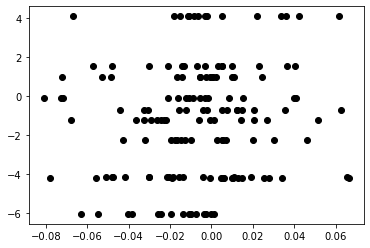

In [197]:
# Testing assumption 1: Linear relationship exists between X and y
plt.plot(X[:10], y[:10], 'o', color='black');
plt.show()


In [198]:

# build the model

model = LinearRegression()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

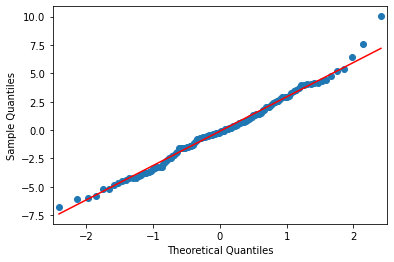

In [199]:

# Testing assumption 2: Normality of the residuals

from statsmodels.graphics.gofplots import qqplot

residuals = y_test - pred_test

qqplot(residuals, line='s');

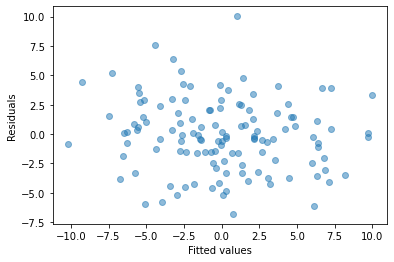

In [200]:
# Testing assumption 3: Homoscedasticity

# plot fitted values vs residuals
plt.scatter(pred_test, residuals, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()



The above three assumptions are satisfied.

In [201]:
# compute MSE on train set
mse_train = np.square(np.subtract(y_train, pred_train)).mean()

#compute MSE on test set
mse_test = np.square(np.subtract(y_test, pred_test)).mean()

print("MSE on train set: ", mse_train)
print("MSE on test set: ", mse_test)


MSE on train set:  9.477015206695722
MSE on test set:  9.150407869806717


In [202]:
# compare the true and learned coefficients
coeffs = pd.DataFrame({'true': coef, 'learned': model.coef_})

coeffs.style.set_caption('True vs. Learned Coefficients')


,true,learned
0,69.564075,69.799756
1,0.000000,-9.344312
2,93.788698,102.704813
3,0.000000,-6.362925
4,8.920656,5.873092
5,0.000000,-1.691751
6,39.278565,42.876698
7,0.000000,-4.079342
8,36.524420,32.555763
9,21.115804,32.451670


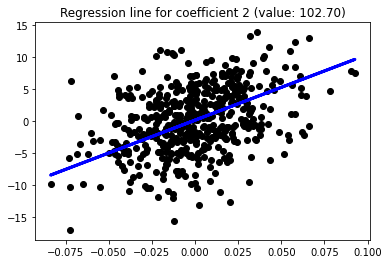

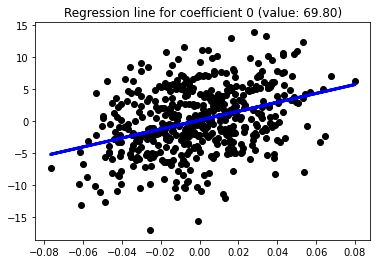

In [203]:
# plot the regression line the top 2 coefficients

idx_top2_coeff = coeffs.sort_values(by='learned', ascending=False).head(2)['learned'].index

# plot for each coefficient
for coeff_idx in idx_top2_coeff:
    reg_line = model.coef_[coeff_idx] * X[:, coeff_idx] + model.intercept_

    plt.scatter(X[:, coeff_idx], y,  color='black')
    plt.plot(X[:, coeff_idx], reg_line, color='blue', linewidth=3)
    plt.title('Regression line for coefficient {} (value: {:.2f})'.format(coeff_idx, model.coef_[coeff_idx]))
    plt.show()


Observations:

1. The dataset shows multiple linear relationships between the different features and the target variable. The Q-Q plot of residuals shows that the data is normally distributed. The data is also Homoscedastic. This makes it a good candidate for linear regression.
2. The MSE on the test set is 9.15, which is slightly lower than the MSE on the train set, 9.47. This indicates that while the model is not overfitting the data, there may be a slight bias in the sampling of the test set.
3. The learned coefficients are very close to the true coefficients. This is expected since the dataset is generated from a linear model.
4. The regression lines for the top 2 coefficients are very close to each other, which indicates that the top 2 coefficients are highly correlated.
5. The overall error is fairly high (over 9.0). The model is not a very good predictor of the target variable.